## Code

Import necessary libraries for data processing, visualization, and machine learning models

In [ ]:
import os
import re
import PIL
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import linear_model, naive_bayes, ensemble, tree, svm, model_selection,\
                    preprocessing, feature_extraction, metrics, base, pipeline

Load the Sleep Efficiency dataset from Google Drive and display the first few rows

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Sets/Sleep_Efficiency.csv")
display(df)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


Remove unnecessary column (ID)

In [ ]:
df.drop(['ID'], axis = 1, inplace = True)

Check for duplicate rows and remove them from the dataset

In [ ]:
print(f"Number of duplicates: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of duplicates after: {df.duplicated().sum()}")

Number of duplicates: 0
Number of duplicates after: 0


 Check for missing values in each column of the dataset

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Bedtime,0
Wakeup time,0
Sleep duration,0
Sleep efficiency,0
REM sleep percentage,0
Deep sleep percentage,0
Light sleep percentage,0
Awakenings,20


Fill missing data in columns with the appropriate value to handle missing data

In [ ]:
df['Awakenings'].fillna(df['Awakenings'].mean(), inplace=True)
df['Caffeine consumption'].fillna(df['Caffeine consumption'].mean(), inplace=True)
df['Alcohol consumption'].fillna(df['Alcohol consumption'].mean(), inplace=True)
df['Exercise frequency'].fillna(df['Exercise frequency'].mean(), inplace=True)

The graph is slightly skewed to the left which means that the bulk of the data points are concentrated on the right side, with a longer tail extending to the left. This suggests that most individuals have relatively higher sleep efficiency, while a smaller number experience lower efficiency.

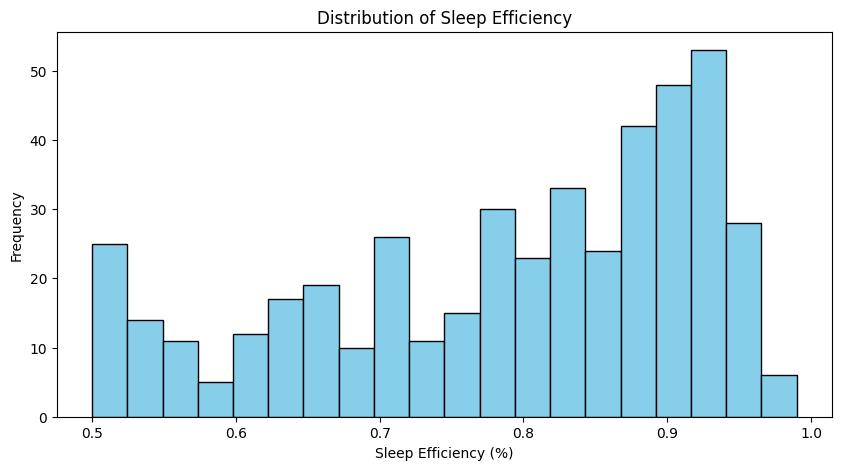

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(df['Sleep efficiency'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sleep Efficiency')
plt.xlabel('Sleep Efficiency (%)')
plt.ylabel('Frequency')
plt.show()

The median age group has a very high variability as manifested by a wider/longer rectangle. It can also be seen that most age groups have high sleep efficiency. The outliers as seen in the lower area of the graph represent individuals with relatively low sleep efficiency.

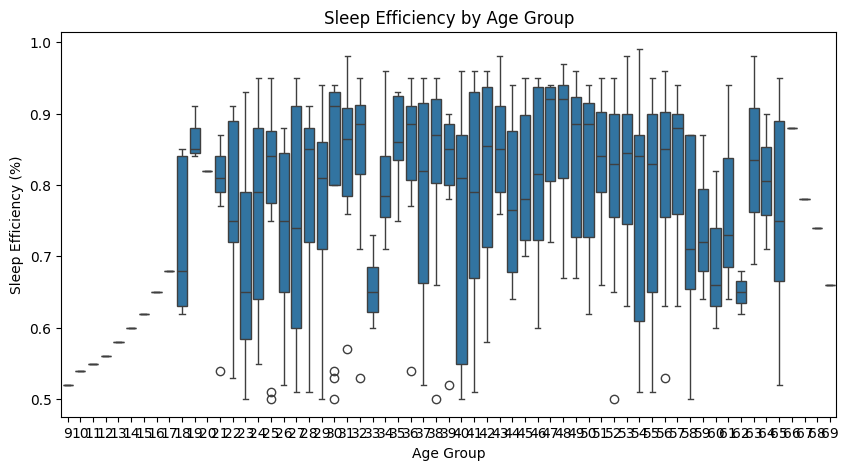

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Age', y='Sleep efficiency', data=df)
plt.title('Sleep Efficiency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Sleep Efficiency (%)')
plt.show()

This plot visualizes the relationship between total sleep time and sleep efficiency. There is a tight clustering in the 7-8 hours of sleep however there is no other visible trend in the graph. A more dispersed arrangement of the dots suggests a weaker correlation of the total sleep time and sleep efficiency. The dashed red line represents the mean sleep efficiency, allowing to see how many individuals fall above or below average efficiency based on their total sleep time.

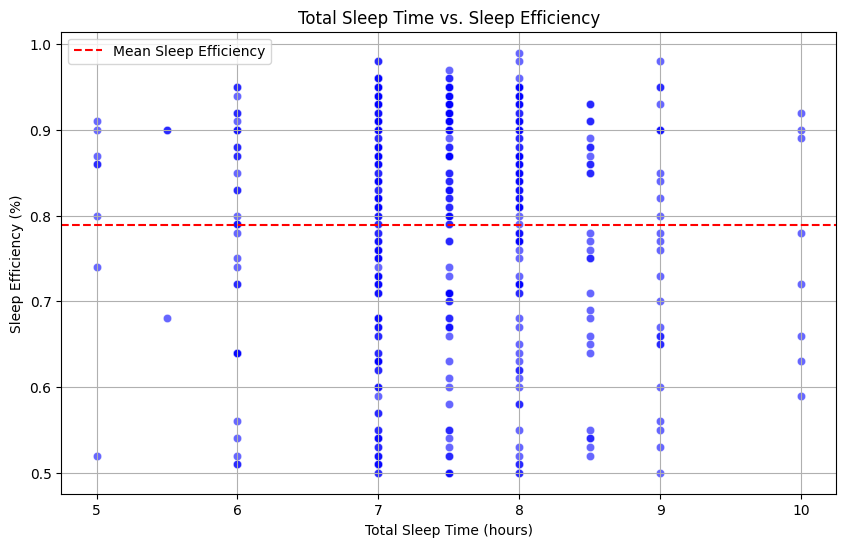

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep duration', y='Sleep efficiency', data=df, color='blue', alpha=0.6)
plt.title('Total Sleep Time vs. Sleep Efficiency')
plt.xlabel('Total Sleep Time (hours)')
plt.ylabel('Sleep Efficiency (%)')
plt.axhline(y=df['Sleep efficiency'].mean(), color='red', linestyle='--', label='Mean Sleep Efficiency')
plt.legend()
plt.grid()
plt.show()

The values in the correlation matrix are Pearson correlation coefficients which represents the relationship of two columns. The further away it is from zero, the stronger the relationship between the two columns or variables. Once it exceeds 0.7 or goes lower than -0.7, one of the two columns will be dropped. `Light sleep percentage` and `Deep sleep percentage` has a coefficient of -0.97 which explains why the former was dropped.

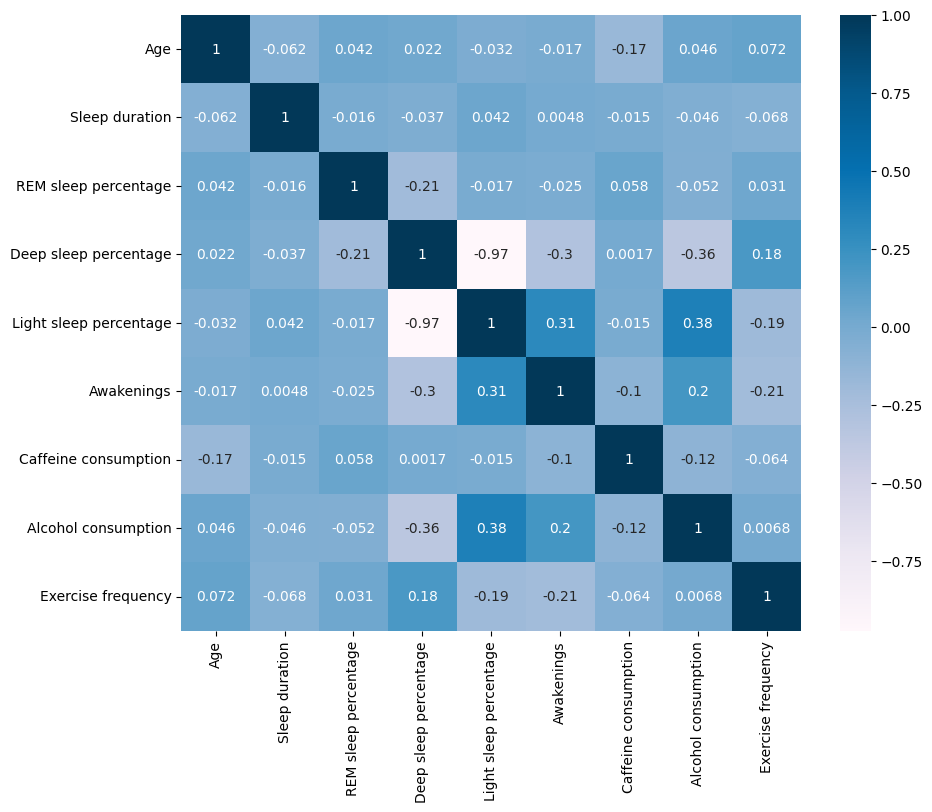

In [ ]:
temp = df.drop(['Sleep efficiency', 'Gender', 'Smoking status', 'Bedtime', 'Wakeup time'], axis=1)
corr_matrix = temp.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='PuBu')
plt.show()

Drop one of the two columns which are highly related with each other

In [ ]:
temp.drop(['Light sleep percentage'], axis = 1, inplace = True)
df.drop(['Light sleep percentage'], axis = 1, inplace = True)

Do one-hot encoding for categorical columns

In [ ]:
df = pd.get_dummies(df, columns=['Gender', 'Smoking status'], drop_first = False)
display(df)

,Age,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Gender_Female,Gender_Male,Smoking status_No,Smoking status_Yes
0,65,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,0.0,0.000000,0.0,3.0,True,False,False,True
1,69,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,3.0,0.000000,3.0,3.0,False,True,False,True
2,40,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,1.0,0.000000,0.0,3.0,True,False,True,False
3,40,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,3.0,50.000000,5.0,1.0,True,False,False,True
4,57,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,3.0,0.000000,3.0,3.0,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,0.0,0.000000,0.0,5.0,True,False,True,False
448,52,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,4.0,25.000000,0.0,3.0,False,True,True,False
449,40,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,1.0,23.653396,3.0,0.0,True,False,False,True
450,45,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,3.0,0.000000,0.0,3.0,False,True,True,False


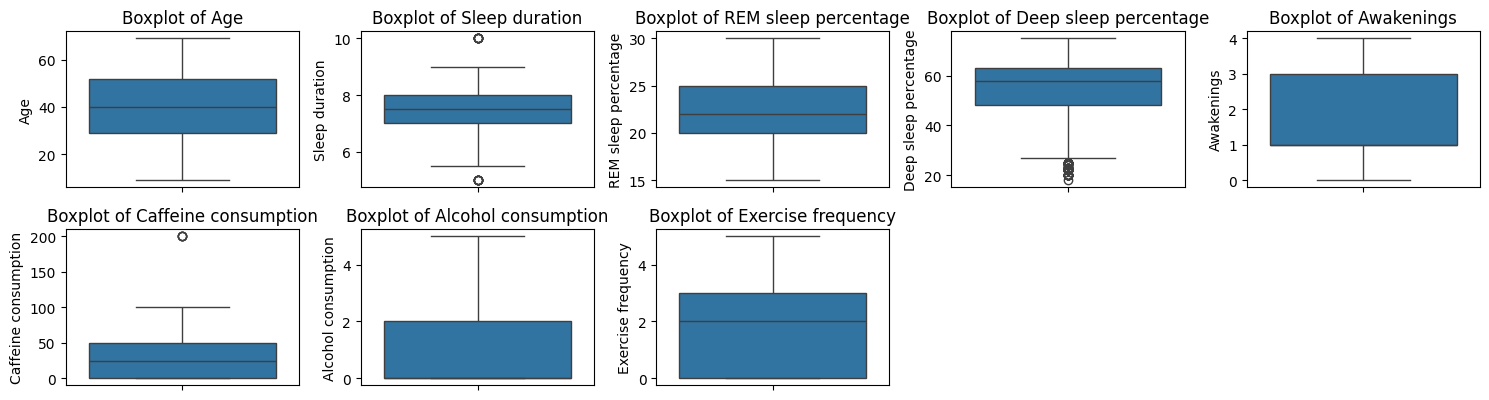

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(temp, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(temp[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

Reduce skewness and handle outliers

In [ ]:
df['Sleep duration'] = np.log(df['Sleep duration'] + 1)
df['Deep sleep percentage'] = np.log(df['Deep sleep percentage'] + 1)
df['Caffeine consumption'] = np.log(df['Caffeine consumption'] + 1)

Transform the data so that each feature (column) has a mean of 0 and a standard deviation of 1.

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(df[['REM sleep percentage','Age', 'Sleep duration', 'Sleep efficiency', 'Deep sleep percentage', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']])

array([[-1.31032529,  1.87834171, -1.77544423, ..., -1.05235364,
        -0.73609454,  0.85285275],
       [-1.02640054,  2.18234688, -0.49240252, ..., -1.05235364,
         1.14567243,  0.85285275],
       [-0.74247579, -0.02169063,  0.63932047, ..., -1.05235364,
        -0.73609454,  0.85285275],
       ...,
       [-0.74247579, -0.02169063,  1.15882752, ...,  0.65608213,
         1.14567243, -1.2642474 ],
       [-1.31032529,  0.35831583, -0.49240252, ..., -1.05235364,
        -0.73609454,  0.85285275],
       [-0.17462629, -1.6937191 ,  0.09011157, ...,  1.04357474,
        -0.73609454, -0.55854735]])

Combine bedtime and wakeup time as a string and drop their original columns

In [ ]:
df['time'] = df['Bedtime']+ " " + df['Wakeup time']
df.drop(['Bedtime', 'Wakeup time'], axis=1, inplace=True)

Transforms the new time column into numerical form

In [ ]:
vectorizer = feature_extraction.text.CountVectorizer()
text_vectorized = vectorizer.fit_transform(df['time'])

text_df = pd.DataFrame(text_vectorized.toarray(), columns=vectorizer.get_feature_names_out())
text_df.reset_index(drop=True, inplace=True)

df_final = pd.concat([df.drop(columns=['time']).reset_index(drop=True), text_df], axis=1)
print(df_final)

     Age  Sleep duration  Sleep efficiency  REM sleep percentage  \
0     65        1.945910              0.88                    18   
1     69        2.079442              0.66                    19   
2     40        2.197225              0.89                    20   
3     40        1.945910              0.51                    23   
4     57        2.197225              0.76                    27   
..   ...             ...               ...                   ...   
447   27        2.140066              0.91                    22   
448   52        1.945910              0.74                    28   
449   40        2.251292              0.55                    20   
450   45        2.079442              0.76                    18   
451   18        2.140066              0.63                    22   

     Deep sleep percentage  Awakenings  Caffeine consumption  \
0                 4.262680         0.0              0.000000   
1                 3.367296         3.0              0.0

Assigns the X and Y variables

In [ ]:
X = df_final.drop(['Sleep efficiency'], axis=1)
y = df_final['Sleep efficiency']

Displays the X variables or columns

In [ ]:
display(X)

,Age,Sleep duration,REM sleep percentage,Deep sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Gender_Female,Gender_Male,...,22,23,24,25,26,27,28,29,30,31
0,65,1.945910,18,4.262680,0.0,0.000000,0.0,3.0,True,False,...,0,0,0,0,0,0,0,0,0,0
1,69,2.079442,19,3.367296,3.0,0.000000,3.0,3.0,False,True,...,0,0,0,0,0,0,0,0,0,0
2,40,2.197225,20,4.262680,1.0,0.000000,0.0,3.0,True,False,...,0,0,0,2,0,0,0,0,2,0
3,40,1.945910,23,3.258097,3.0,3.931826,5.0,1.0,True,False,...,0,0,0,0,0,0,0,0,2,0
4,57,2.197225,27,4.025352,3.0,0.000000,3.0,3.0,False,True,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,2.140066,22,4.060443,0.0,0.000000,0.0,5.0,True,False,...,1,0,0,0,0,0,0,0,1,0
448,52,1.945910,28,4.060443,4.0,3.258097,0.0,3.0,False,True,...,0,0,0,0,0,0,0,0,0,2
449,40,2.251292,20,3.496508,1.0,3.204915,3.0,0.0,True,False,...,0,1,0,0,0,0,0,0,1,0
450,45,2.079442,18,4.290459,3.0,0.000000,0.0,3.0,False,True,...,0,0,0,0,0,0,0,2,0,0


Use 80-20 split for training and testing with 22 as the random state

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 22)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

In [ ]:
import math
print("Mean Squared Error:", mse)
print("RMSE:", math.sqrt(mse))
print("R-squared", r2)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 0.004062919695760575
RMSE: 0.0637410361993008
R-squared 0.7484302574196479
Coefficients: [ 9.33675321e-04  5.34321364e-04  5.88091532e-03  2.41007740e-01
 -3.38647764e-02  3.16614913e-03 -6.29119314e-03  7.27507036e-03
 -2.32024660e+10 -2.32024660e+10  6.87944966e+08  6.87944966e+08
  2.00494073e+08  2.00494073e+08  2.00494073e+08  2.00494073e+08
  2.00494073e+08  2.00494073e+08  2.00494073e+08  2.00494073e+08
  2.00494073e+08  2.00494073e+08  2.00494073e+08  2.00494073e+08
  2.00494073e+08  2.00494073e+08  2.00494073e+08  2.00494073e+08
  2.00494073e+08  2.00494073e+08  2.00494073e+08  2.00494073e+08
  2.00494073e+08 -2.33850980e+01  2.00494073e+08  2.00494073e+08
  2.00494073e+08  2.00494073e+08  2.00494073e+08  2.00494073e+08
  2.00494073e+08  2.00494073e+08  2.00494073e+08  2.00494073e+08
  2.00494073e+08]
Intercept: 20509580368.087578


**Interpretation**

An MSE of 0.0040 suggests that the predictions are fairly close to the actual values. An RMSE of 0.0637 indicates that, on average, the predictions are off by about 0.06 units from the actual values. The large negative coefficients suggest that those features might be problematic or highly collinear, potentially inflating their significance and leading to instability in the model. The `REM sleep percentage` column, unfortunately, wasn't scaled for some reasons which was manifested by a very large intercept of 20509580368. Overall, the model seems to fit reasonably well, with moderate predictive power (as indicated by R²) and low error metrics (MSE and RMSE).